# Integration and batch correction of 5 human embryo datasets: 
- Datasets:
PMID: 27062923 (Petropoulos_2016)\
PMID: 34789876 (Tyser_2021)\
PMID: 31830756 (Xiang_2019)\
PMID: 31435013 (Zhou_2019)\
PMID: 38657603 (Xiao_2024)

- Author: Yiming Chao @HKU & CTSCB
- Update: 2025-6-19

# Integrate embryo datasets x5

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80,dpi_save=100,color_map='Reds')
sc.logging.print_version_and_date()

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
plt.show()
matplotlib.rcParams.update({'figure.figsize': (6,6)})

Running Scanpy 1.10.3, on 2025-01-10 01:05.


In [3]:
adata_tyser = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Tyser_cs7.h5ad')

In [4]:
adata_tyser.obs['Batch'] = 'Tyser_2021'
adata_tyser.obs['EmbryoStage'] = 'CS7'
# adata_tyser.obs['EmbryoStage'] = 'D17.5'
adata_tyser.obs['EmbryoIdent'] = 'CS7_1'
adata_tyser.obs['CellType'] = adata_tyser.obs['sub_cluster']

In [5]:
adata_tyser.obs['sub_cluster'].unique()

['Blood Progenitors', 'DE(P)', 'Advanced Mesoderm', 'Primitive Streak', 'YS Mesoderm', ..., 'Erythro-Myeloid Progenitors', 'NNE', 'PGC', 'DE(NP)', 'Myeloid Progenitors']
Length: 19
Categories (19, object): ['Advanced Mesoderm', 'Amnion', 'Axial Mesoderm', 'Blood Progenitors', ..., 'PGC', 'Primitive Streak', 'YS Endoderm', 'YS Mesoderm']

In [6]:
adata_tyser.obs['cluster_id'].unique()

['Hemogenic Endothelial Progenitors', 'Endoderm', 'Advanced Mesoderm', 'Primitive Streak', 'ExE Mesoderm', ..., 'Erythroblasts', 'Emergent Mesoderm', 'Epiblast', 'Nascent Mesoderm', 'Non-Neural Ectoderm']
Length: 11
Categories (11, object): ['Advanced Mesoderm', 'Axial Mesoderm', 'Emergent Mesoderm', 'Endoderm', ..., 'Hemogenic Endothelial Progenitors', 'Nascent Mesoderm', 'Non-Neural Ectoderm', 'Primitive Streak']

In [7]:
adata_tyser.obs

X0        X1                         cluster_id  \
Cell_0     12.213498 -0.550328  Hemogenic Endothelial Progenitors   
Cell_1      2.404149 -7.389468                           Endoderm   
Cell_2      6.219126 -2.577739                  Advanced Mesoderm   
Cell_3      1.528913  0.412943                   Primitive Streak   
Cell_4      9.373722  4.137366                       ExE Mesoderm   
...              ...       ...                                ...   
Cell_1190   0.538678  3.815438                           Epiblast   
Cell_1191   2.494623  1.739064                   Primitive Streak   
Cell_1192   0.190426  1.626420                   Primitive Streak   
Cell_1193   0.720511  3.806959                           Epiblast   
Cell_1194   0.527140 -2.200988                   Nascent Mesoderm   

                 sub_cluster     cell_name       Batch EmbryoStage  \
Cell_0     Blood Progenitors  SS.sc7785290  Tyser_2021         CS7   
Cell_1                 DE(P)  SS.sc7786612  Tyser_2021         CS7   
Cell_2     Advanced Mesoderm  SS.sc7786605  Tyser_2021         CS7   
Cell_3      Primitive Streak  SS.sc7785737  Tyser_2021         CS7   
Cell_4           YS Mesoderm  SS.sc7785398  Tyser_2021         CS7   
...                      ...           ...         ...         ...   
Cell_1190           Epiblast  SS.sc7785965  Tyser_2021         CS7   
Cell_1191   Primitive Streak  SS.sc7788259  Tyser_2021         CS7   
Cell_1192   Primitive Streak  SS.sc7786123  Tyser_2021         CS7   
Cell_1193           Epiblast  SS.sc7786212  Tyser_2021         CS7   
Cell_1194   Nascent Mesoderm  SS.sc7785932  Tyser_2021         CS7   

          EmbryoIdent           CellType  
Cell_0          CS7_1  Blood Progenitors  
Cell_1          CS7_1              DE(P)  
Cell_2          CS7_1  Advanced Mesoderm  
Cell_3          CS7_1   Primitive Streak  
Cell_4          CS7_1        YS Mesoderm  
...               ...                ...  
Cell_1190       CS7_1           Epiblast  
Cell_1191       CS7_1   Primitive Streak  
Cell_1192       CS7_1   Primitive Streak  
Cell_1193       CS7_1           Epiblast  
Cell_1194       CS7_1   Nascent Mesoderm  

[1195 rows x 9 columns]

In [8]:
adata_xiang = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Xiang_d6_14.h5ad')

/mnt/yiming/nfs_share/anaconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
adata_xiang.var_names_make_unique()

In [10]:
adata_xiang.obs['Embryo ID'].unique()

['D6N1', 'D6N2', 'D6N3', 'D7N1', 'D10A1', ..., 'D9A4', 'D9A5', 'D9A6', 'D14_2', 'D14_3']
Length: 42
Categories (42, object): ['D6A1', 'D6A2', 'D6A3', 'D6A4', ..., 'D14A3', 'D14_1', 'D14_2', 'D14_3']

In [11]:
adata_xiang.obs['Batch'] = 'Xiang_2019'
adata_xiang.obs['EmbryoStage'] = adata_xiang.obs['Day']
adata_xiang.obs['EmbryoIdent'] = adata_xiang.obs['Embryo ID']
adata_xiang.obs['CellType'] = adata_xiang.obs['Group']

In [12]:
adata_xiang.obs

Day Embryo ID Group       Batch EmbryoStage EmbryoIdent CellType
D6N1B23    D6      D6N1   ICM  Xiang_2019          D6        D6N1      ICM
D6N1B6     D6      D6N1   ICM  Xiang_2019          D6        D6N1      ICM
D6N1S1     D6      D6N1   EPI  Xiang_2019          D6        D6N1      EPI
D6N1S15    D6      D6N1   EPI  Xiang_2019          D6        D6N1      EPI
D6N1S19    D6      D6N1   ICM  Xiang_2019          D6        D6N1      ICM
...       ...       ...   ...         ...         ...         ...      ...
D14_3S16  D14     D14_3   EPI  Xiang_2019         D14       D14_3      EPI
D14_3S9   D14     D14_3   CTB  Xiang_2019         D14       D14_3      CTB
D14_2S2   D14     D14_2   STB  Xiang_2019         D14       D14_2      STB
D14_2B1   D14     D14_2   EVT  Xiang_2019         D14       D14_2      EVT
D14_2B3   D14     D14_2   EVT  Xiang_2019         D14       D14_2      EVT

[555 rows x 7 columns]

In [13]:
adata_zhou = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Zhou_d6_12.h5ad')

In [14]:
adata_zhou.obs

Sample Type Original  Day   IVC  \
Tri_hv_D10_IVC5_E1_B1_1  Tri_hv_D10_IVC5_E1_B1_1  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_2  Tri_hv_D10_IVC5_E1_B1_2  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_3  Tri_hv_D10_IVC5_E1_B1_3  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_4  Tri_hv_D10_IVC5_E1_B1_4  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_5  Tri_hv_D10_IVC5_E1_B1_5  Tri       hv  D10  IVC5   
...                                          ...  ...      ...  ...   ...   
Tri_hv_D8_IVC2_E7_B3_90  Tri_hv_D8_IVC2_E7_B3_90  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_91  Tri_hv_D8_IVC2_E7_B3_91  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_92  Tri_hv_D8_IVC2_E7_B3_92  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_95  Tri_hv_D8_IVC2_E7_B3_95  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_96  Tri_hv_D8_IVC2_E7_B3_96  Tri       hv   D8  IVC2   

                        Embryo Batch Day_Emb  Cluster Lineage     Sex  
Tri_hv_D10_IVC5_E1_B1_1     E1    B1  D10_E1        3      TE  Female  
Tri_hv_D10_IVC5_E1_B1_2     E1    B1  D10_E1        4      TE  Female  
Tri_hv_D10_IVC5_E1_B1_3     E1    B1  D10_E1        3      TE  Female  
Tri_hv_D10_IVC5_E1_B1_4     E1    B1  D10_E1        3      TE  Female  
Tri_hv_D10_IVC5_E1_B1_5     E1    B1  D10_E1        0      TE  Female  
...                        ...   ...     ...      ...     ...     ...  
Tri_hv_D8_IVC2_E7_B3_90     E7    B3   D8_E7        6     Epi  Female  
Tri_hv_D8_IVC2_E7_B3_91     E7    B3   D8_E7        2      TE  Female  
Tri_hv_D8_IVC2_E7_B3_92     E7    B3   D8_E7        2      TE  Female  
Tri_hv_D8_IVC2_E7_B3_95     E7    B3   D8_E7        0      TE  Female  
Tri_hv_D8_IVC2_E7_B3_96     E7    B3   D8_E7        0      TE  Female  

[2544 rows x 11 columns]

In [15]:
adata_zhou.obs['Batch'] = 'Zhou_2016'
adata_zhou.obs['EmbryoStage'] = adata_zhou.obs['Day']
adata_zhou.obs['EmbryoIdent'] = adata_zhou.obs['Day_Emb']
adata_zhou.obs['CellType'] = adata_zhou.obs['Lineage']

In [16]:
adata_zhou.obs

Sample Type Original  Day   IVC  \
Tri_hv_D10_IVC5_E1_B1_1  Tri_hv_D10_IVC5_E1_B1_1  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_2  Tri_hv_D10_IVC5_E1_B1_2  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_3  Tri_hv_D10_IVC5_E1_B1_3  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_4  Tri_hv_D10_IVC5_E1_B1_4  Tri       hv  D10  IVC5   
Tri_hv_D10_IVC5_E1_B1_5  Tri_hv_D10_IVC5_E1_B1_5  Tri       hv  D10  IVC5   
...                                          ...  ...      ...  ...   ...   
Tri_hv_D8_IVC2_E7_B3_90  Tri_hv_D8_IVC2_E7_B3_90  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_91  Tri_hv_D8_IVC2_E7_B3_91  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_92  Tri_hv_D8_IVC2_E7_B3_92  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_95  Tri_hv_D8_IVC2_E7_B3_95  Tri       hv   D8  IVC2   
Tri_hv_D8_IVC2_E7_B3_96  Tri_hv_D8_IVC2_E7_B3_96  Tri       hv   D8  IVC2   

                        Embryo      Batch Day_Emb  Cluster Lineage     Sex  \
Tri_hv_D10_IVC5_E1_B1_1     E1  Zhou_2016  D10_E1        3      TE  Female   
Tri_hv_D10_IVC5_E1_B1_2     E1  Zhou_2016  D10_E1        4      TE  Female   
Tri_hv_D10_IVC5_E1_B1_3     E1  Zhou_2016  D10_E1        3      TE  Female   
Tri_hv_D10_IVC5_E1_B1_4     E1  Zhou_2016  D10_E1        3      TE  Female   
Tri_hv_D10_IVC5_E1_B1_5     E1  Zhou_2016  D10_E1        0      TE  Female   
...                        ...        ...     ...      ...     ...     ...   
Tri_hv_D8_IVC2_E7_B3_90     E7  Zhou_2016   D8_E7        6     Epi  Female   
Tri_hv_D8_IVC2_E7_B3_91     E7  Zhou_2016   D8_E7        2      TE  Female   
Tri_hv_D8_IVC2_E7_B3_92     E7  Zhou_2016   D8_E7        2      TE  Female   
Tri_hv_D8_IVC2_E7_B3_95     E7  Zhou_2016   D8_E7        0      TE  Female   
Tri_hv_D8_IVC2_E7_B3_96     E7  Zhou_2016   D8_E7        0      TE  Female   

                        EmbryoStage EmbryoIdent CellType  
Tri_hv_D10_IVC5_E1_B1_1         D10      D10_E1       TE  
Tri_hv_D10_IVC5_E1_B1_2         D10      D10_E1       TE  
Tri_hv_D10_IVC5_E1_B1_3         D10      D10_E1       TE  
Tri_hv_D10_IVC5_E1_B1_4         D10      D10_E1       TE  
Tri_hv_D10_IVC5_E1_B1_5         D10      D10_E1       TE  
...                             ...         ...      ...  
Tri_hv_D8_IVC2_E7_B3_90          D8       D8_E7      Epi  
Tri_hv_D8_IVC2_E7_B3_91          D8       D8_E7       TE  
Tri_hv_D8_IVC2_E7_B3_92          D8       D8_E7       TE  
Tri_hv_D8_IVC2_E7_B3_95          D8       D8_E7       TE  
Tri_hv_D8_IVC2_E7_B3_96          D8       D8_E7       TE  

[2544 rows x 14 columns]

In [17]:
adata_petro = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Petro_d3_7.h5ad')

In [18]:
adata_petro.obs

Comment[ENA_SAMPLE] Comment[BioSD_SAMPLE]  \
E5.5.101             ERS888416          SAMEA3581267   
E5.5.100             ERS888415          SAMEA3581266   
E6.2.114             ERS888779          SAMEA3581630   
E6.2.104             ERS888774          SAMEA3581625   
E6.2.107             ERS888776          SAMEA3581627   
...                        ...                   ...   
E3.49.3407          ERS1079322          SAMEA3892188   
E3.51.3426          ERS1079338          SAMEA3892204   
E3.47.3391          ERS1079307          SAMEA3892173   
E3.52.3431          ERS1079342          SAMEA3892208   
E3.53.3438          ERS1079349          SAMEA3892215   

           Characteristics[single cell well quality] Material Type  \
E5.5.101                                          OK          cell   
E5.5.100                                          OK          cell   
E6.2.114                                          OK          cell   
E6.2.104                                          OK          cell   
E6.2.107                                          OK          cell   
...                                              ...           ...   
E3.49.3407                                        OK          cell   
E3.51.3426                                        OK          cell   
E3.47.3391                                        OK          cell   
E3.52.3431                                        OK          cell   
E3.53.3438                                        OK          cell   

            Characteristics[cell] Characteristics[organism]  \
E5.5.101                      494              Homo sapiens   
E5.5.100                      493              Homo sapiens   
E6.2.114                      857              Homo sapiens   
E6.2.104                      852              Homo sapiens   
E6.2.107                      854              Homo sapiens   
...                           ...                       ...   
E3.49.3407                   1502              Homo sapiens   
E3.51.3426                   1518              Homo sapiens   
E3.47.3391                   1487              Homo sapiens   
E3.52.3431                   1522              Homo sapiens   
E3.53.3438                   1529              Homo sapiens   

           Characteristics[organism part] Characteristics[individual]  \
E5.5.101                           embryo                        E5.5   
E5.5.100                           embryo                        E5.5   
E6.2.114                           embryo                        E6.2   
E6.2.104                           embryo                        E6.2   
E6.2.107                           embryo                        E6.2   
...                                   ...                         ...   
E3.49.3407                         embryo                       E3.49   
E3.51.3426                         embryo                       E3.51   
E3.47.3391                         embryo                       E3.47   
E3.52.3431                         embryo                       E3.52   
E3.53.3438                         embryo                       E3.53   

           Characteristics[developmental stage] Characteristics[treatment]  \
E5.5.101                        embryonic day 5                         No   
E5.5.100                        embryonic day 5                         No   
E6.2.114                        embryonic day 6                         No   
E6.2.104                        embryonic day 6                         No   
E6.2.107                        embryonic day 6                         No   
...                                         ...                        ...   
E3.49.3407                      embryonic day 3                         No   
E3.51.3426                      embryonic day 3                         No   
E3.47.3391                      embryonic day 3                         No   
E3.52.3431                      embryonic day 3                         No   
E3.53

In [19]:
adata_petro.obs['Characteristics[developmental stage]'].unique()

['embryonic day 5', 'embryonic day 6', 'embryonic day 7', 'embryonic day 4', 'embryonic day 3']
Categories (5, object): ['embryonic day 3', 'embryonic day 4', 'embryonic day 5', 'embryonic day 6', 'embryonic day 7']

In [20]:
embryo_stage = ['embryonic day 5', 'embryonic day 6', 'embryonic day 7', 'embryonic day 4', 'embryonic day 3']
day = ['D5', 'D6', 'D7', 'D4', 'D3']
day_dict = {embryo_stage[i]: day[i] for i in range(len(embryo_stage))}

In [21]:
adata_petro.obs['Batch'] = 'Petropoulos_2016'
adata_petro.obs['EmbryoStage'] = adata_petro.obs['Characteristics[developmental stage]'].map(day_dict)
adata_petro.obs['EmbryoIdent'] = adata_petro.obs['Characteristics[individual]']
adata_petro.obs['CellType'] = adata_petro.obs['Characteristics[inferred lineage]']

In [22]:
adata_petro.obs

Comment[ENA_SAMPLE] Comment[BioSD_SAMPLE]  \
E5.5.101             ERS888416          SAMEA3581267   
E5.5.100             ERS888415          SAMEA3581266   
E6.2.114             ERS888779          SAMEA3581630   
E6.2.104             ERS888774          SAMEA3581625   
E6.2.107             ERS888776          SAMEA3581627   
...                        ...                   ...   
E3.49.3407          ERS1079322          SAMEA3892188   
E3.51.3426          ERS1079338          SAMEA3892204   
E3.47.3391          ERS1079307          SAMEA3892173   
E3.52.3431          ERS1079342          SAMEA3892208   
E3.53.3438          ERS1079349          SAMEA3892215   

           Characteristics[single cell well quality] Material Type  \
E5.5.101                                          OK          cell   
E5.5.100                                          OK          cell   
E6.2.114                                          OK          cell   
E6.2.104                                          OK          cell   
E6.2.107                                          OK          cell   
...                                              ...           ...   
E3.49.3407                                        OK          cell   
E3.51.3426                                        OK          cell   
E3.47.3391                                        OK          cell   
E3.52.3431                                        OK          cell   
E3.53.3438                                        OK          cell   

            Characteristics[cell] Characteristics[organism]  \
E5.5.101                      494              Homo sapiens   
E5.5.100                      493              Homo sapiens   
E6.2.114                      857              Homo sapiens   
E6.2.104                      852              Homo sapiens   
E6.2.107                      854              Homo sapiens   
...                           ...                       ...   
E3.49.3407                   1502              Homo sapiens   
E3.51.3426                   1518              Homo sapiens   
E3.47.3391                   1487              Homo sapiens   
E3.52.3431                   1522              Homo sapiens   
E3.53.3438                   1529              Homo sapiens   

           Characteristics[organism part] Characteristics[individual]  \
E5.5.101                           embryo                        E5.5   
E5.5.100                           embryo                        E5.5   
E6.2.114                           embryo                        E6.2   
E6.2.104                           embryo                        E6.2   
E6.2.107                           embryo                        E6.2   
...                                   ...                         ...   
E3.49.3407                         embryo                       E3.49   
E3.51.3426                         embryo                       E3.51   
E3.47.3391                         embryo                       E3.47   
E3.52.3431                         embryo                       E3.52   
E3.53.3438                         embryo                       E3.53   

           Characteristics[developmental stage] Characteristics[treatment]  \
E5.5.101                        embryonic day 5                         No   
E5.5.100                        embryonic day 5                         No   
E6.2.114                        embryonic day 6                         No   
E6.2.104                        embryonic day 6                         No   
E6.2.107                        embryonic day 6                         No   
...                                         ...                        ...   
E3.49.3407                      embryonic day 3                         No   
E3.51.3426                      embryonic day 3                         No   
E3.47.3391                      embryonic day 3                         No   
E3.52.3431                      embryonic day 3                         No   
E3.53

In [23]:
# adata_xiao = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Xiao_cs8.h5ad')
adata_xiao = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/Xiao_cs8-2k.h5ad')

In [24]:
adata_xiao.obs['Batch'] = 'Xiao_2024'
adata_xiao.obs['EmbryoStage'] = 'CS8'
adata_xiao.obs['EmbryoIdent'] = 'CS8_1'
adata_xiao.obs['CellType'] = adata_xiao.obs['clusters']

In [25]:
adatas = [adata_tyser, adata_xiang, adata_zhou, adata_petro, adata_xiao]
adata = ad.concat(adatas)

/mnt/yiming/nfs_share/anaconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/merge.py:1362: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [26]:
adata.obs

Batch EmbryoStage EmbryoIdent           CellType
Cell_0     Tyser_2021         CS7       CS7_1  Blood Progenitors
Cell_1     Tyser_2021         CS7       CS7_1              DE(P)
Cell_2     Tyser_2021         CS7       CS7_1  Advanced Mesoderm
Cell_3     Tyser_2021         CS7       CS7_1   Primitive Streak
Cell_4     Tyser_2021         CS7       CS7_1        YS Mesoderm
...               ...         ...         ...                ...
CS8_13568   Xiao_2024         CS8       CS8_1        AM.EXE.Meso
CS8_9480    Xiao_2024         CS8       CS8_1        AM.EXE.Meso
CS8_7342    Xiao_2024         CS8       CS8_1               Meso
CS8_32689   Xiao_2024         CS8       CS8_1                HEP
CS8_7577    Xiao_2024         CS8       CS8_1               Meso

[7823 rows x 4 columns]

In [27]:
adata

AnnData object with n_obs × n_vars = 7823 × 15461
    obs: 'Batch', 'EmbryoStage', 'EmbryoIdent', 'CellType'
    obsm: 'X_umap'

In [29]:
adata.write_h5ad('/mnt/yiming/nfs_share/hema_wave/human-embryox5-ds-uncorrected.h5ad')

## fastMNN in R sce

In [12]:
seed = 64

In [4]:
adata = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/human-embryox5-ds-uncorrected.h5ad')
r_pcs = pd.read_csv("/mnt/yiming/nfs_share/hema_wave/human-embryox5-ds-corrected_pcs-v3.tsv", sep="\t")
adata.obsm["X_pca"] = np.array(r_pcs)

In [14]:
adata

AnnData object with n_obs × n_vars = 7823 × 15461
    obs: 'Batch', 'EmbryoStage', 'EmbryoIdent', 'CellType', 'CellType_v2', 'CellGroup_v2'
    uns: 'Batch_colors', 'CellGroup_v2_colors', 'CellType_v2_colors', 'EmbryoStage_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs['CellType_v2'] = adata.obs['CellType']

replace_map = {'D3': '8 cell', 'D4': 'Morula', 'D5': 'Prelineage'}
adata.obs['CellType_v2'] = adata.obs['EmbryoStage'].map(replace_map).fillna(adata.obs['CellType_v2'])

adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['EPI', 'Epi', 'Epiblast', 'epiblast'], 'Epi')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['PSA-EPI'], 'PSA-Epi')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['PE', 'PrE', 'Hypoblast', 'primitive endoderm'], 
                                                            'Hypoblast')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['trophectoderm', 'TE'], 'TE')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['DE(P)', 'DE(NP)'], 'DE')

adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Advanced Mesoderm'], 'AdvMes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Amnion'], 'Amn')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Axial Mesoderm'], 'Axial Mes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Advanced Mesoderm'], 'AdvMes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Blood Progenitors'], 'BP')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Emergent Mesoderm'], 'EmMes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Erythro-Myeloid Progenitors'], 'EMP')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Hemogenic Endothelium'], 'HE')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Myeloid Progenitors'], 'MP')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Nascent Mesoderm'], 'NasMes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Primitive Streak'], 'PS')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['YS Endoderm'], 'YSE')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['YS Mesoderm'], 'YSM')

adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['YS.EXE.Meso-A'], 'YSM')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['YS.EXE.Meso-B'], 'YSM')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['YS.Endo'], 'YSE')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['AM.EXE.Meso'], 'AdvMes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Visceral.Endo'], 'VE')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Meso'], 'Mes')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['AM'], 'Amn')
adata.obs['CellType_v2'] = adata.obs['CellType_v2'].replace(['Erythroblasts'], 'Ery')

In [7]:
group_mapping = {
    'Early embryo': ['8 cell', 'Morula', 'Prelineage'], 
    'Prelineage':['ICM', 'Epi', 'PS', 'PSA-Epi', 'Gast/PS', 'Epi/Ecto'],
    'Trophoectoderm':['TE', 'STB', 'CTB', 'EVT'],
    'Mesoderm': ['NasMes', 'AdvMes', 'Axial Mes', 'EmMes', 'YSM', 'Noto', 'Mes'],  
    'Ectoderm':['Amn', 'NNE'],
    'Endoderm':['Hypoblast', 'DE', 'YSE', 'VE', 'Endo'], 
    'Blood': ['HE', 'HEP', 'BP', 'EMP', 'MP', 'Ery']
}

def map_cell_group(cell_type):
    for group, values in group_mapping.items():
        if cell_type in values:
            return group
    return cell_type

adata.obs['CellGroup_v2'] = adata.obs['CellType_v2'].apply(map_cell_group)

In [8]:
adata

AnnData object with n_obs × n_vars = 7823 × 15461
    obs: 'Batch', 'EmbryoStage', 'EmbryoIdent', 'CellType', 'CellType_v2', 'CellGroup_v2'
    obsm: 'X_umap', 'X_pca'

In [24]:
# use X_pca for UMAP generation
sc.pp.neighbors(adata, n_pcs=20, n_neighbors=120, use_rep="X_pca")
sc.tl.umap(adata, min_dist=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:16)


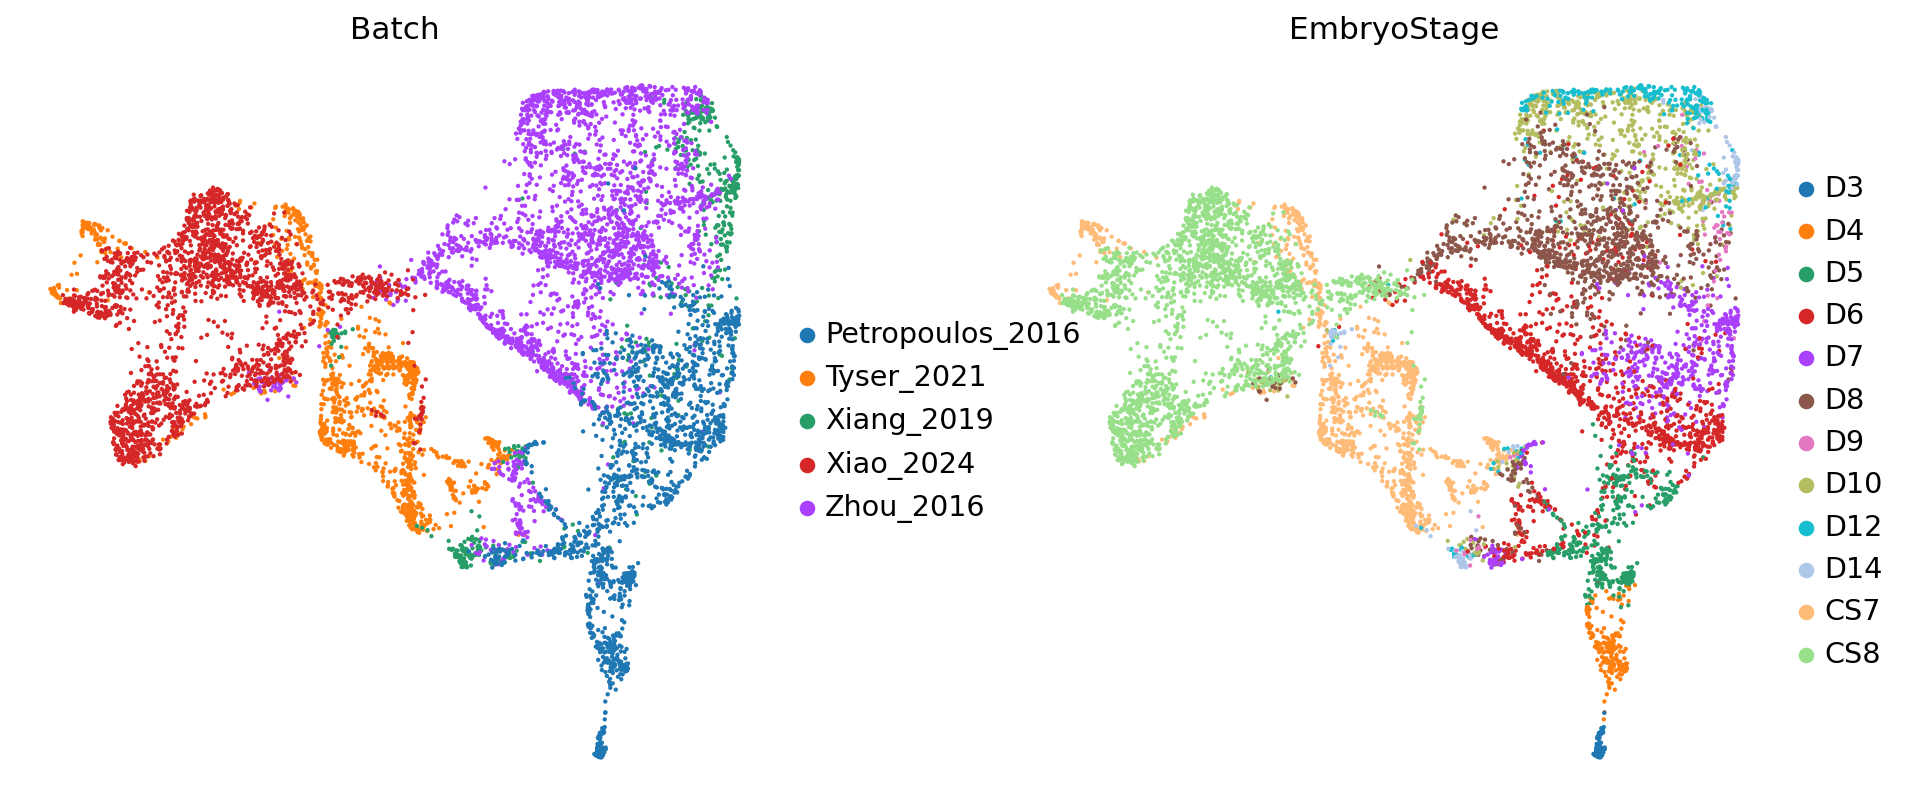

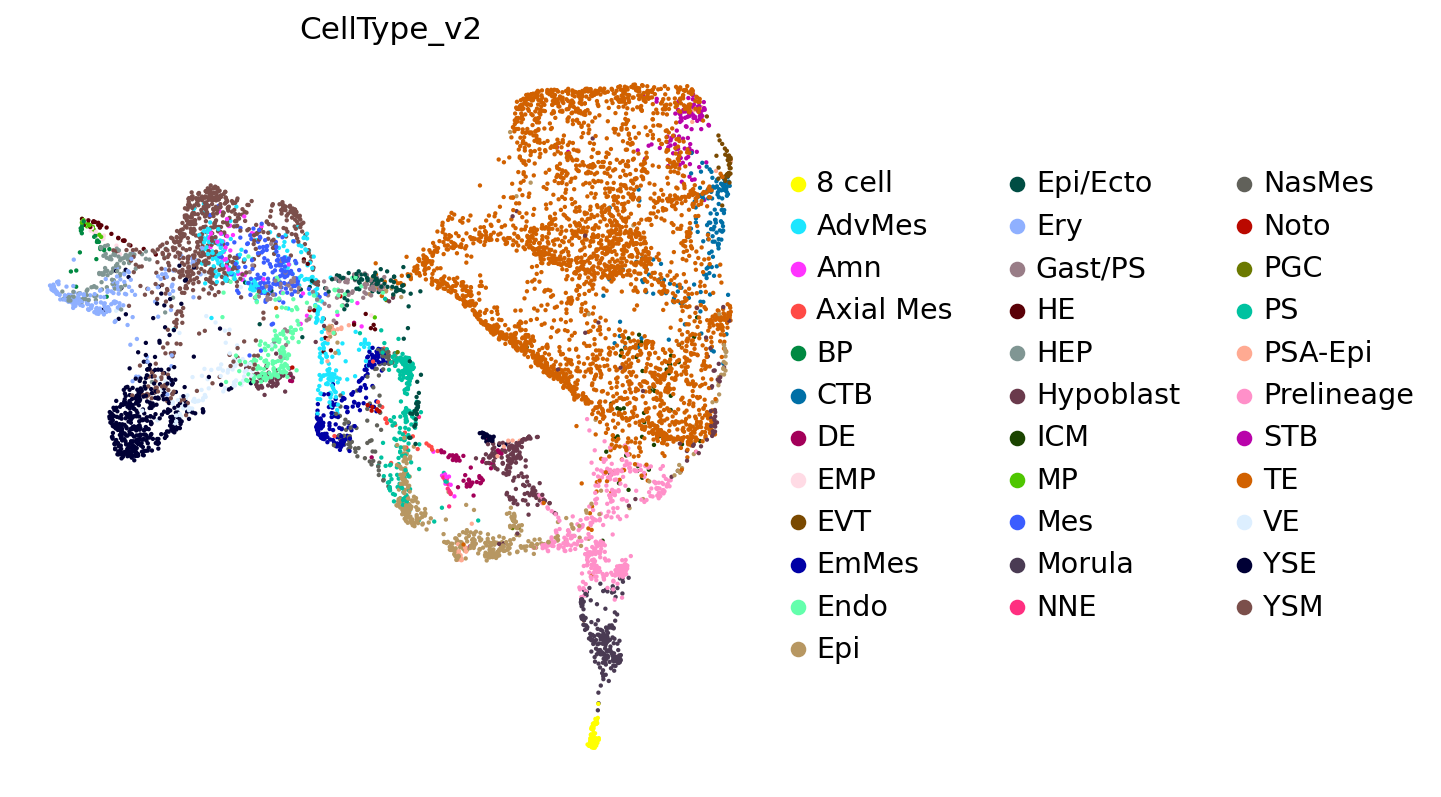

In [9]:
sc.pl.umap(
    adata,
    color=['Batch', "EmbryoStage"],
    frameon=False, wspace=0.2)
sc.pl.umap(
    adata,
    color=['CellType_v2'],
    frameon=False)

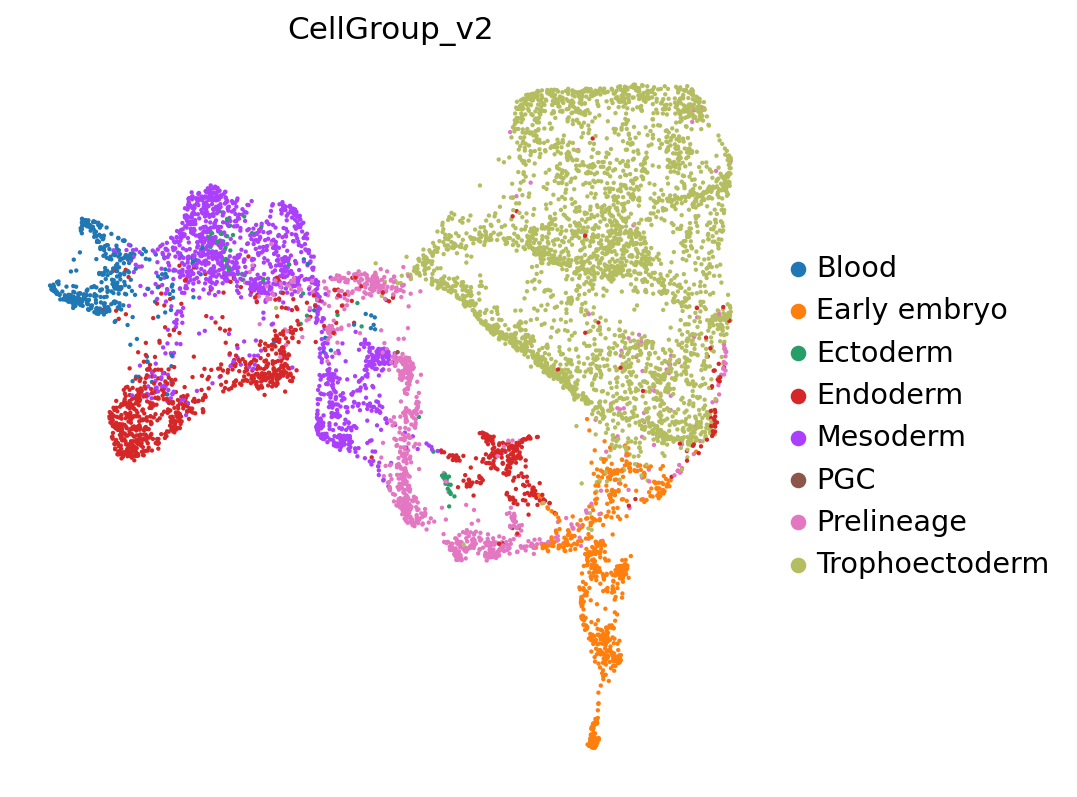

In [10]:
sc.pl.umap(
    adata,
    color=['CellGroup_v2'],
    frameon=False)

In [27]:
num = list(np.arange(0, 12, 1))
sample_order = ['D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D14', 'CS7', 'CS8']
sample_dict = dict(zip(num, sample_order))

/tmp/ipykernel_258296/2732523418.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


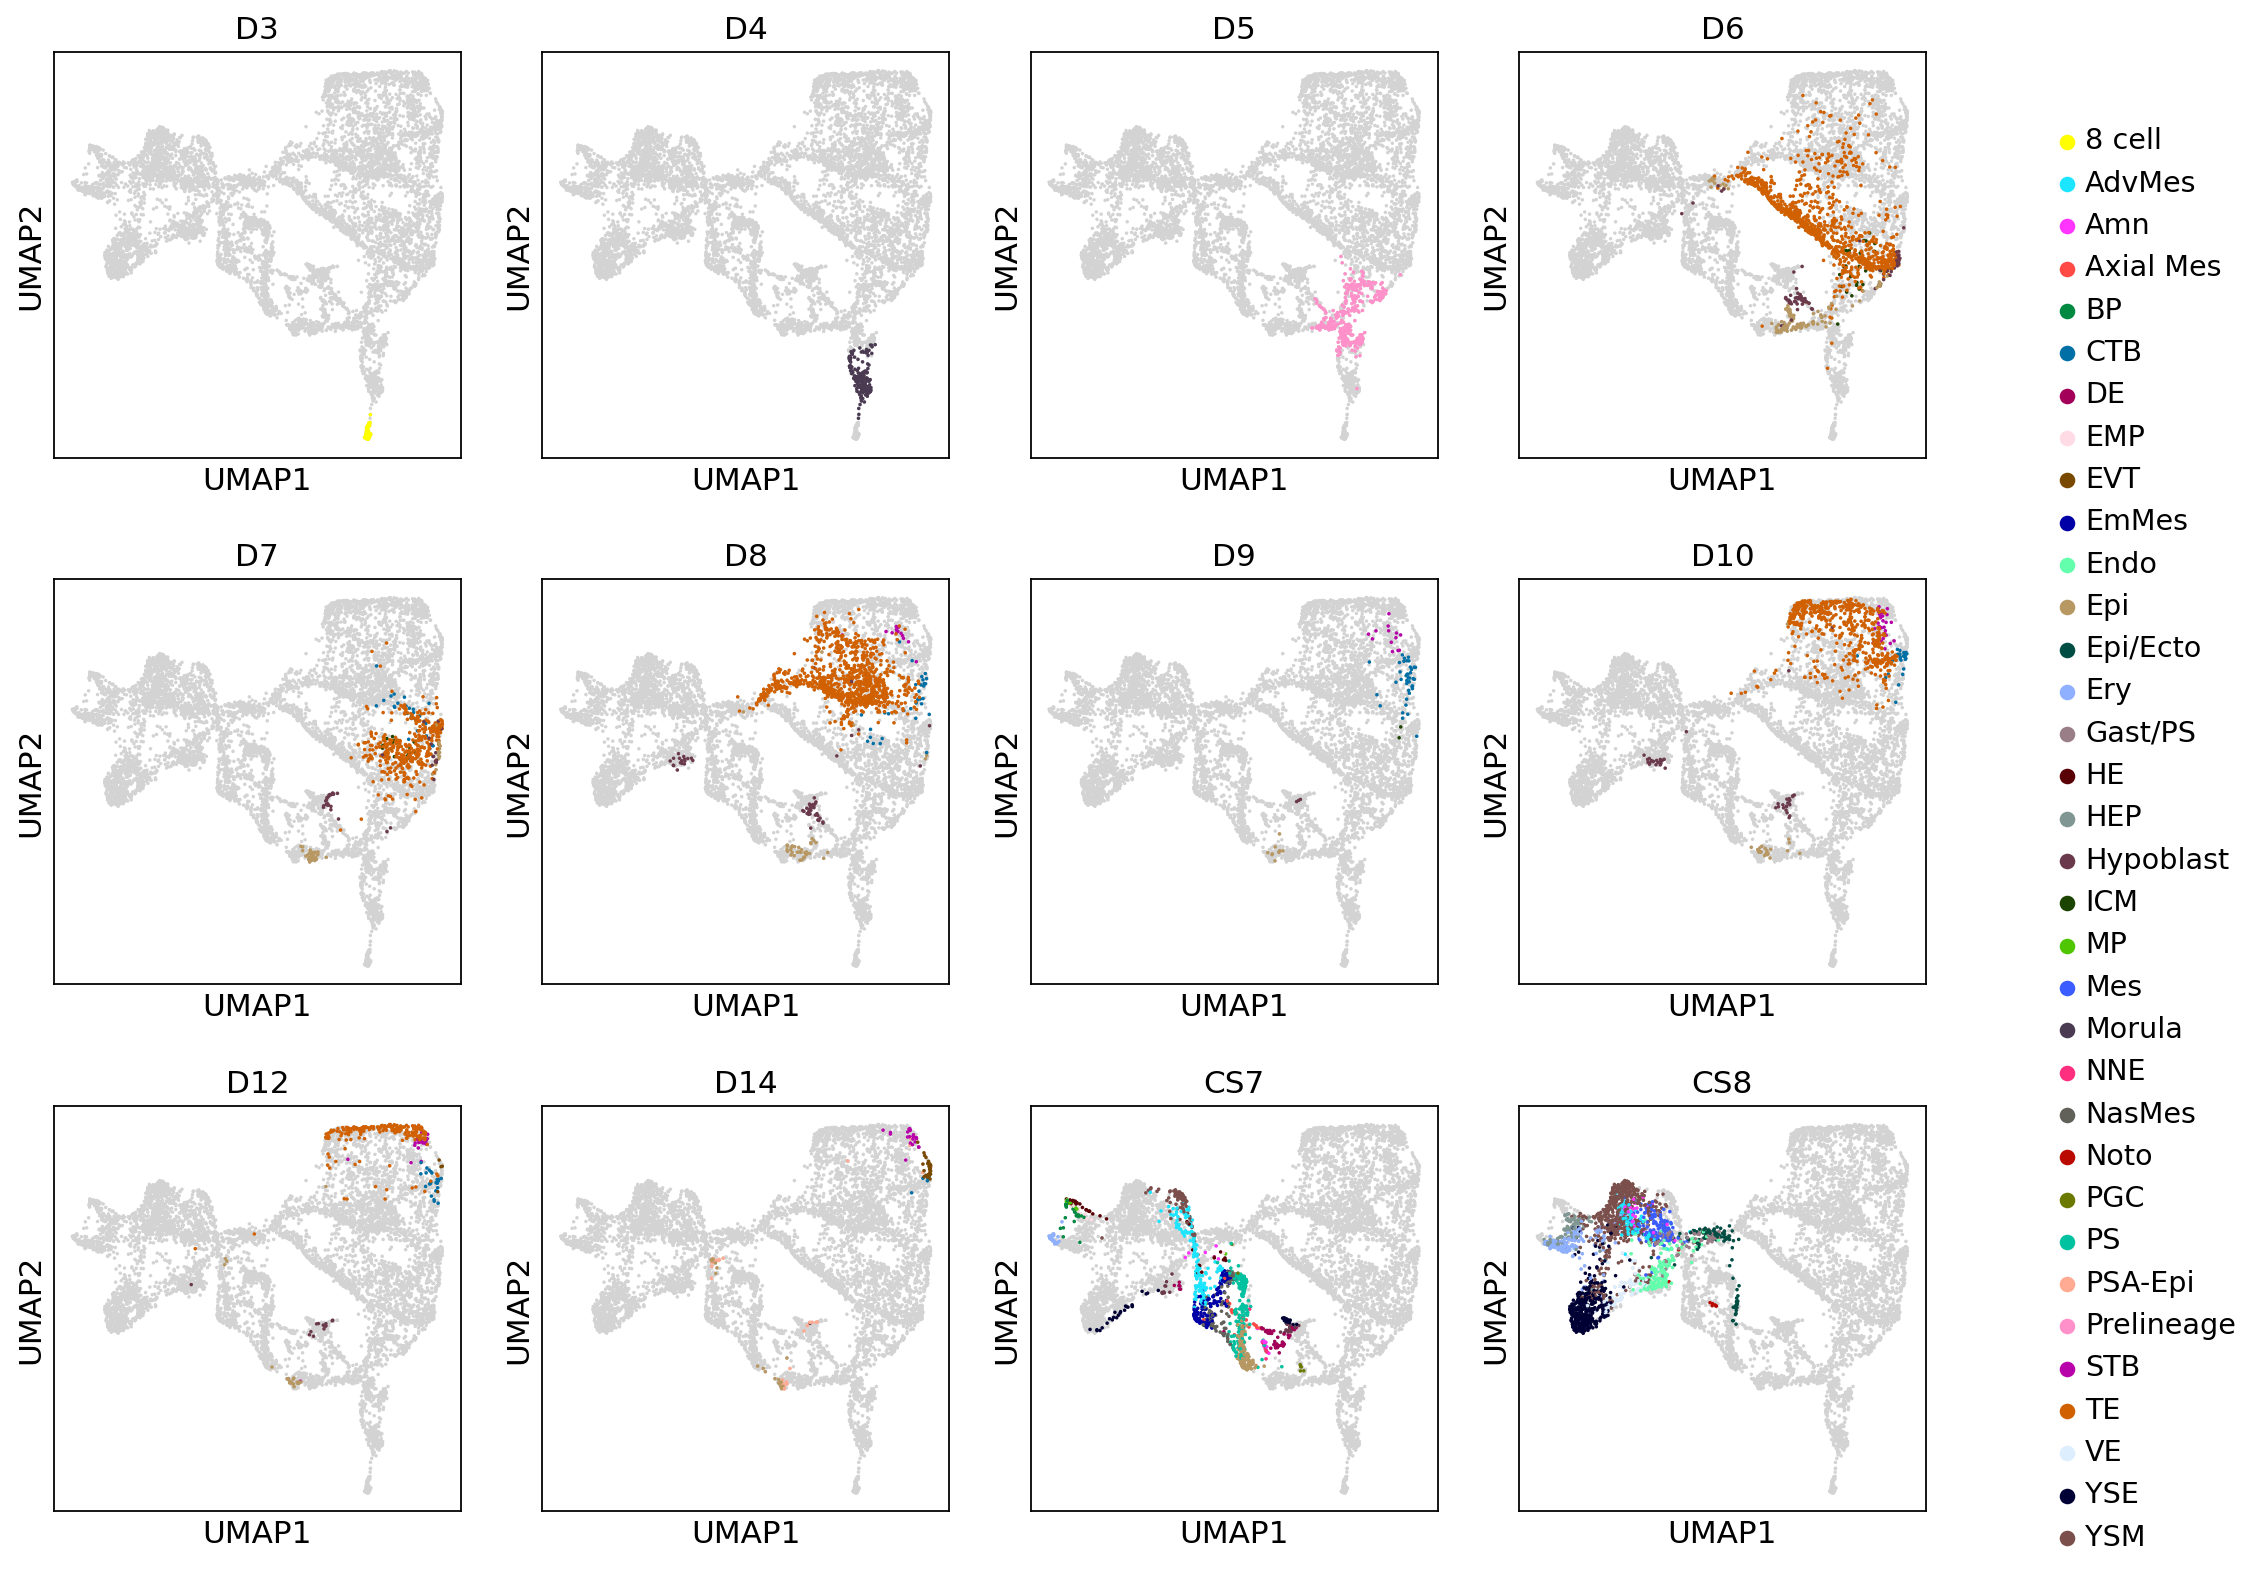

In [28]:
fig, axs = plt.subplots(3, 4, figsize=(15, 12), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
axs = axs.flatten()

legend_handles = []
legend_labels = []

for i in sample_dict:
    sc.pl.umap(adata, size=10, show=False, ax=axs[i], return_fig=fig)
    sc.pl.umap(adata[adata.obs['EmbryoStage'] == sample_order[i]], color='CellType_v2', size=10, 
               show=False, return_fig=fig, ax=axs[i], title=sample_order[i])

    handles, labels = axs[i].get_legend_handles_labels()

    for handle, label in zip(handles, labels):
        if label not in legend_labels:
            legend_handles.append(handle)
            legend_labels.append(label)

    # Removing individual legends from each subplot
    axs[i].get_legend().remove()

sorted_legend_labels, sorted_legend_handles = zip(*sorted(zip(legend_labels, legend_handles)))

fig.legend(sorted_legend_handles, sorted_legend_labels, loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1, frameon=False)

plt.tight_layout()
plt.show()

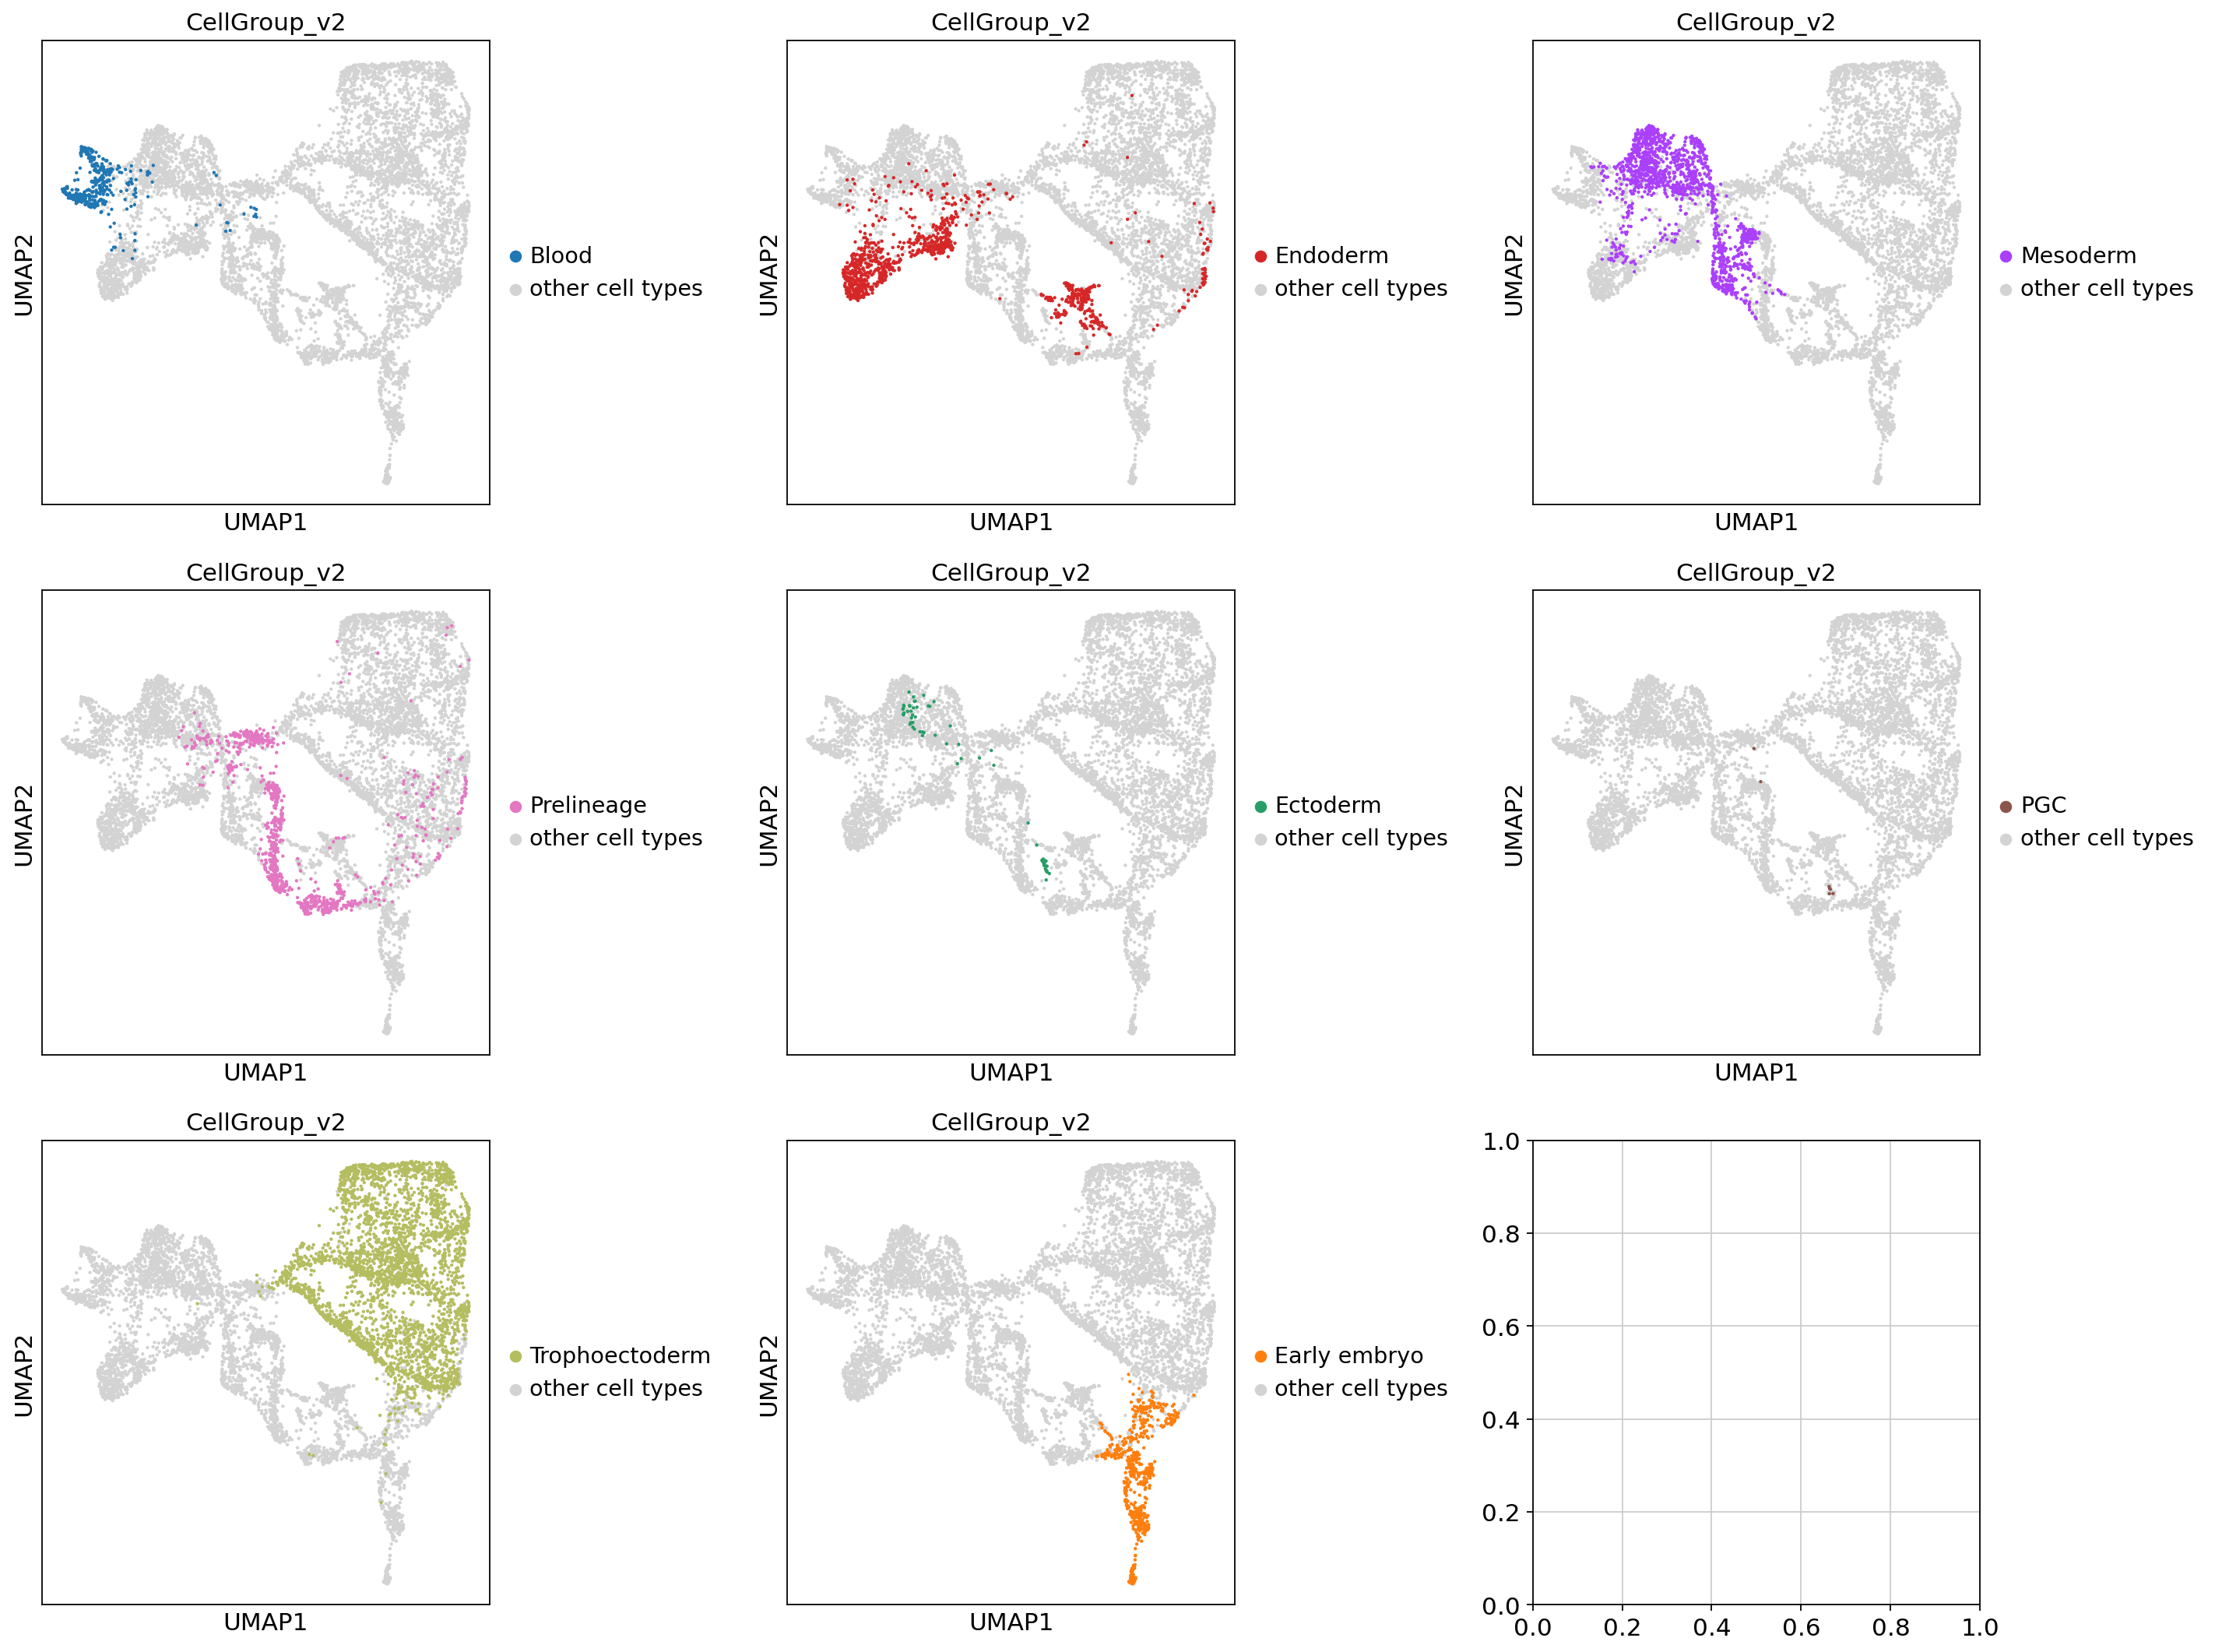

In [29]:
group_label_present = adata.obs['CellGroup_v2'].unique()
num_plots = len(group_label_present)
num_cols = 3
num_rows = -(-num_plots // num_cols) 

fig_width = num_cols * 6 
fig_height = num_rows * 4.5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

for i, label in enumerate(group_label_present):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    sc.pl.umap(adata, color=["CellGroup_v2"], groups=[label], show=False, ax=ax)

    legend_texts = ax.get_legend().get_texts()
    for legend_text in legend_texts:
        if legend_text.get_text() == "NA":
            legend_text.set_text("other cell types")

    ax.set_aspect('auto', adjustable='box', anchor='C')

plt.tight_layout()
plt.show()

In [31]:
adata.obs['Batch'].value_counts()

Batch
Zhou_2016           2544
Xiao_2024           2000
Petropoulos_2016    1529
Tyser_2021          1195
Xiang_2019           555
Name: count, dtype: int64

In [30]:
adata.write_h5ad('/mnt/yiming/nfs_share/hema_wave/embryox5-ds_mnn.h5ad')